In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [18]:
df = pd.read_excel("glass.xlsx", sheet_name="glass")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [19]:
df.shape

(214, 10)

In [20]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [22]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [23]:
df.drop_duplicates(keep = 'first')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


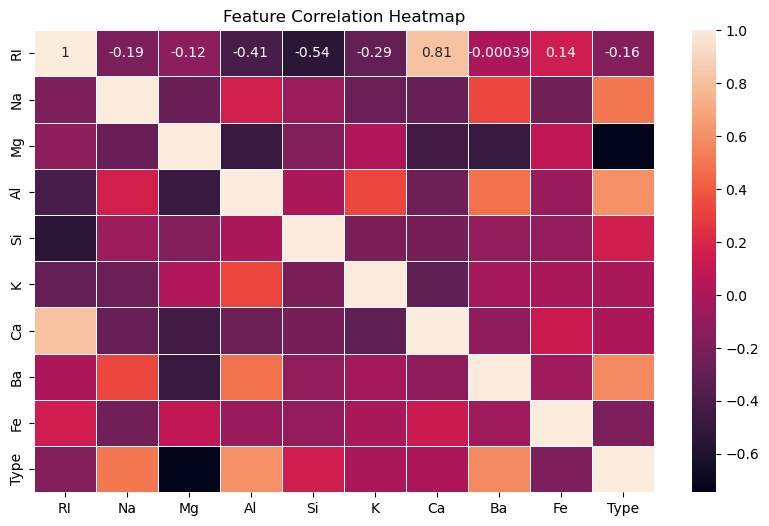

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

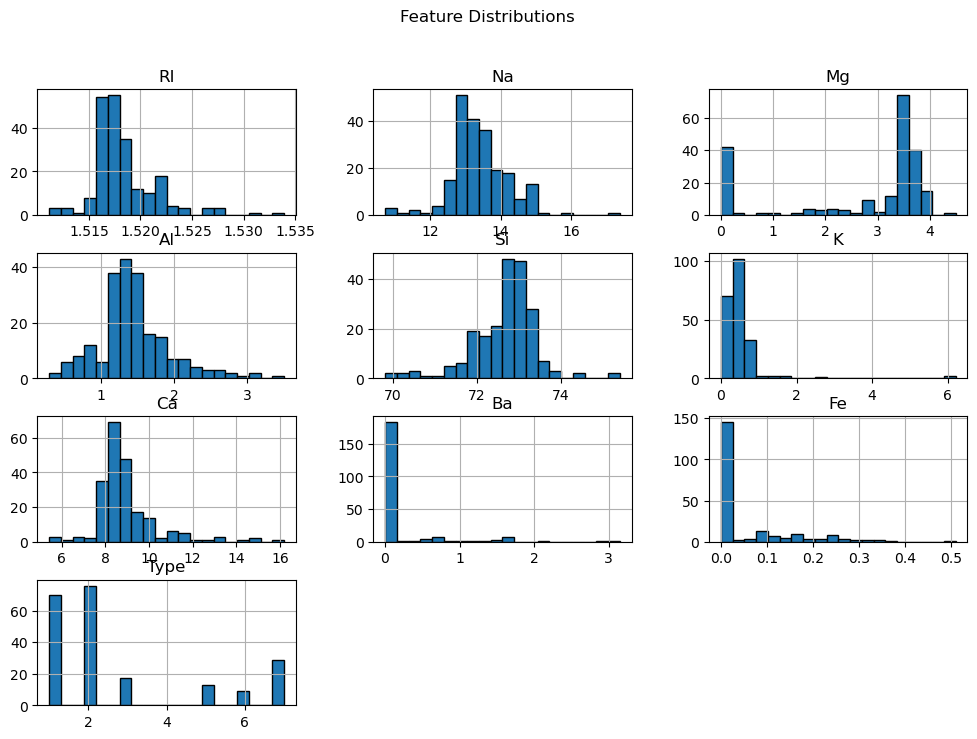

In [25]:
# Histograms of numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

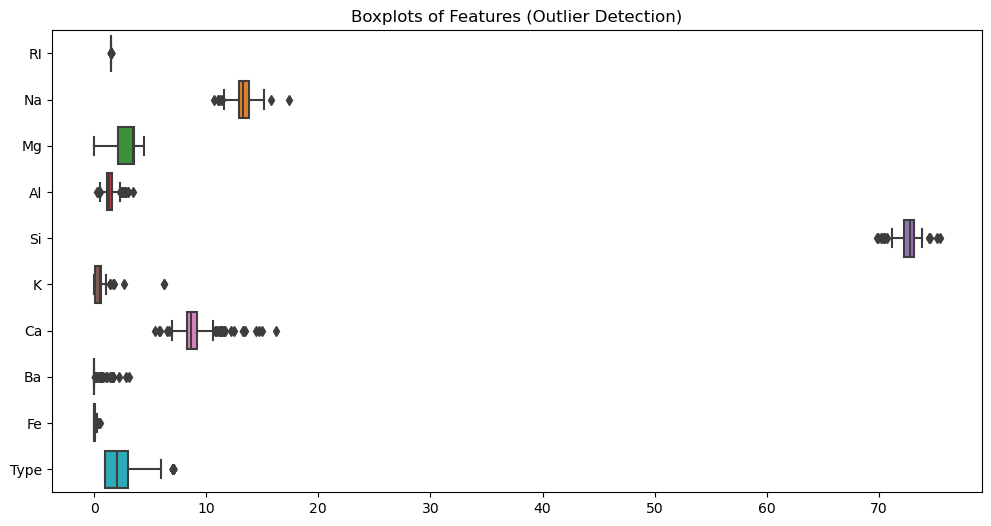

In [26]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Features (Outlier Detection)")
plt.show()

In [27]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#IQR

In [28]:
from scipy import stats
import numpy as np

# Compute Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df))

# Define a threshold (commonly 3)
threshold = 3

# Filter rows where all column Z-scores are below the threshold
df_cleaned = df[(z_scores < threshold).all(axis=1)]

print(df_cleaned)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
208  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0     7
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7

[194 rows x 10 columns]


In [29]:
#LB = Q1 - 1.5*IQR
#UB = Q3 + 1.5*IQR

In [30]:
#df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]
#df_cleaned

<Figure size 1000x800 with 0 Axes>

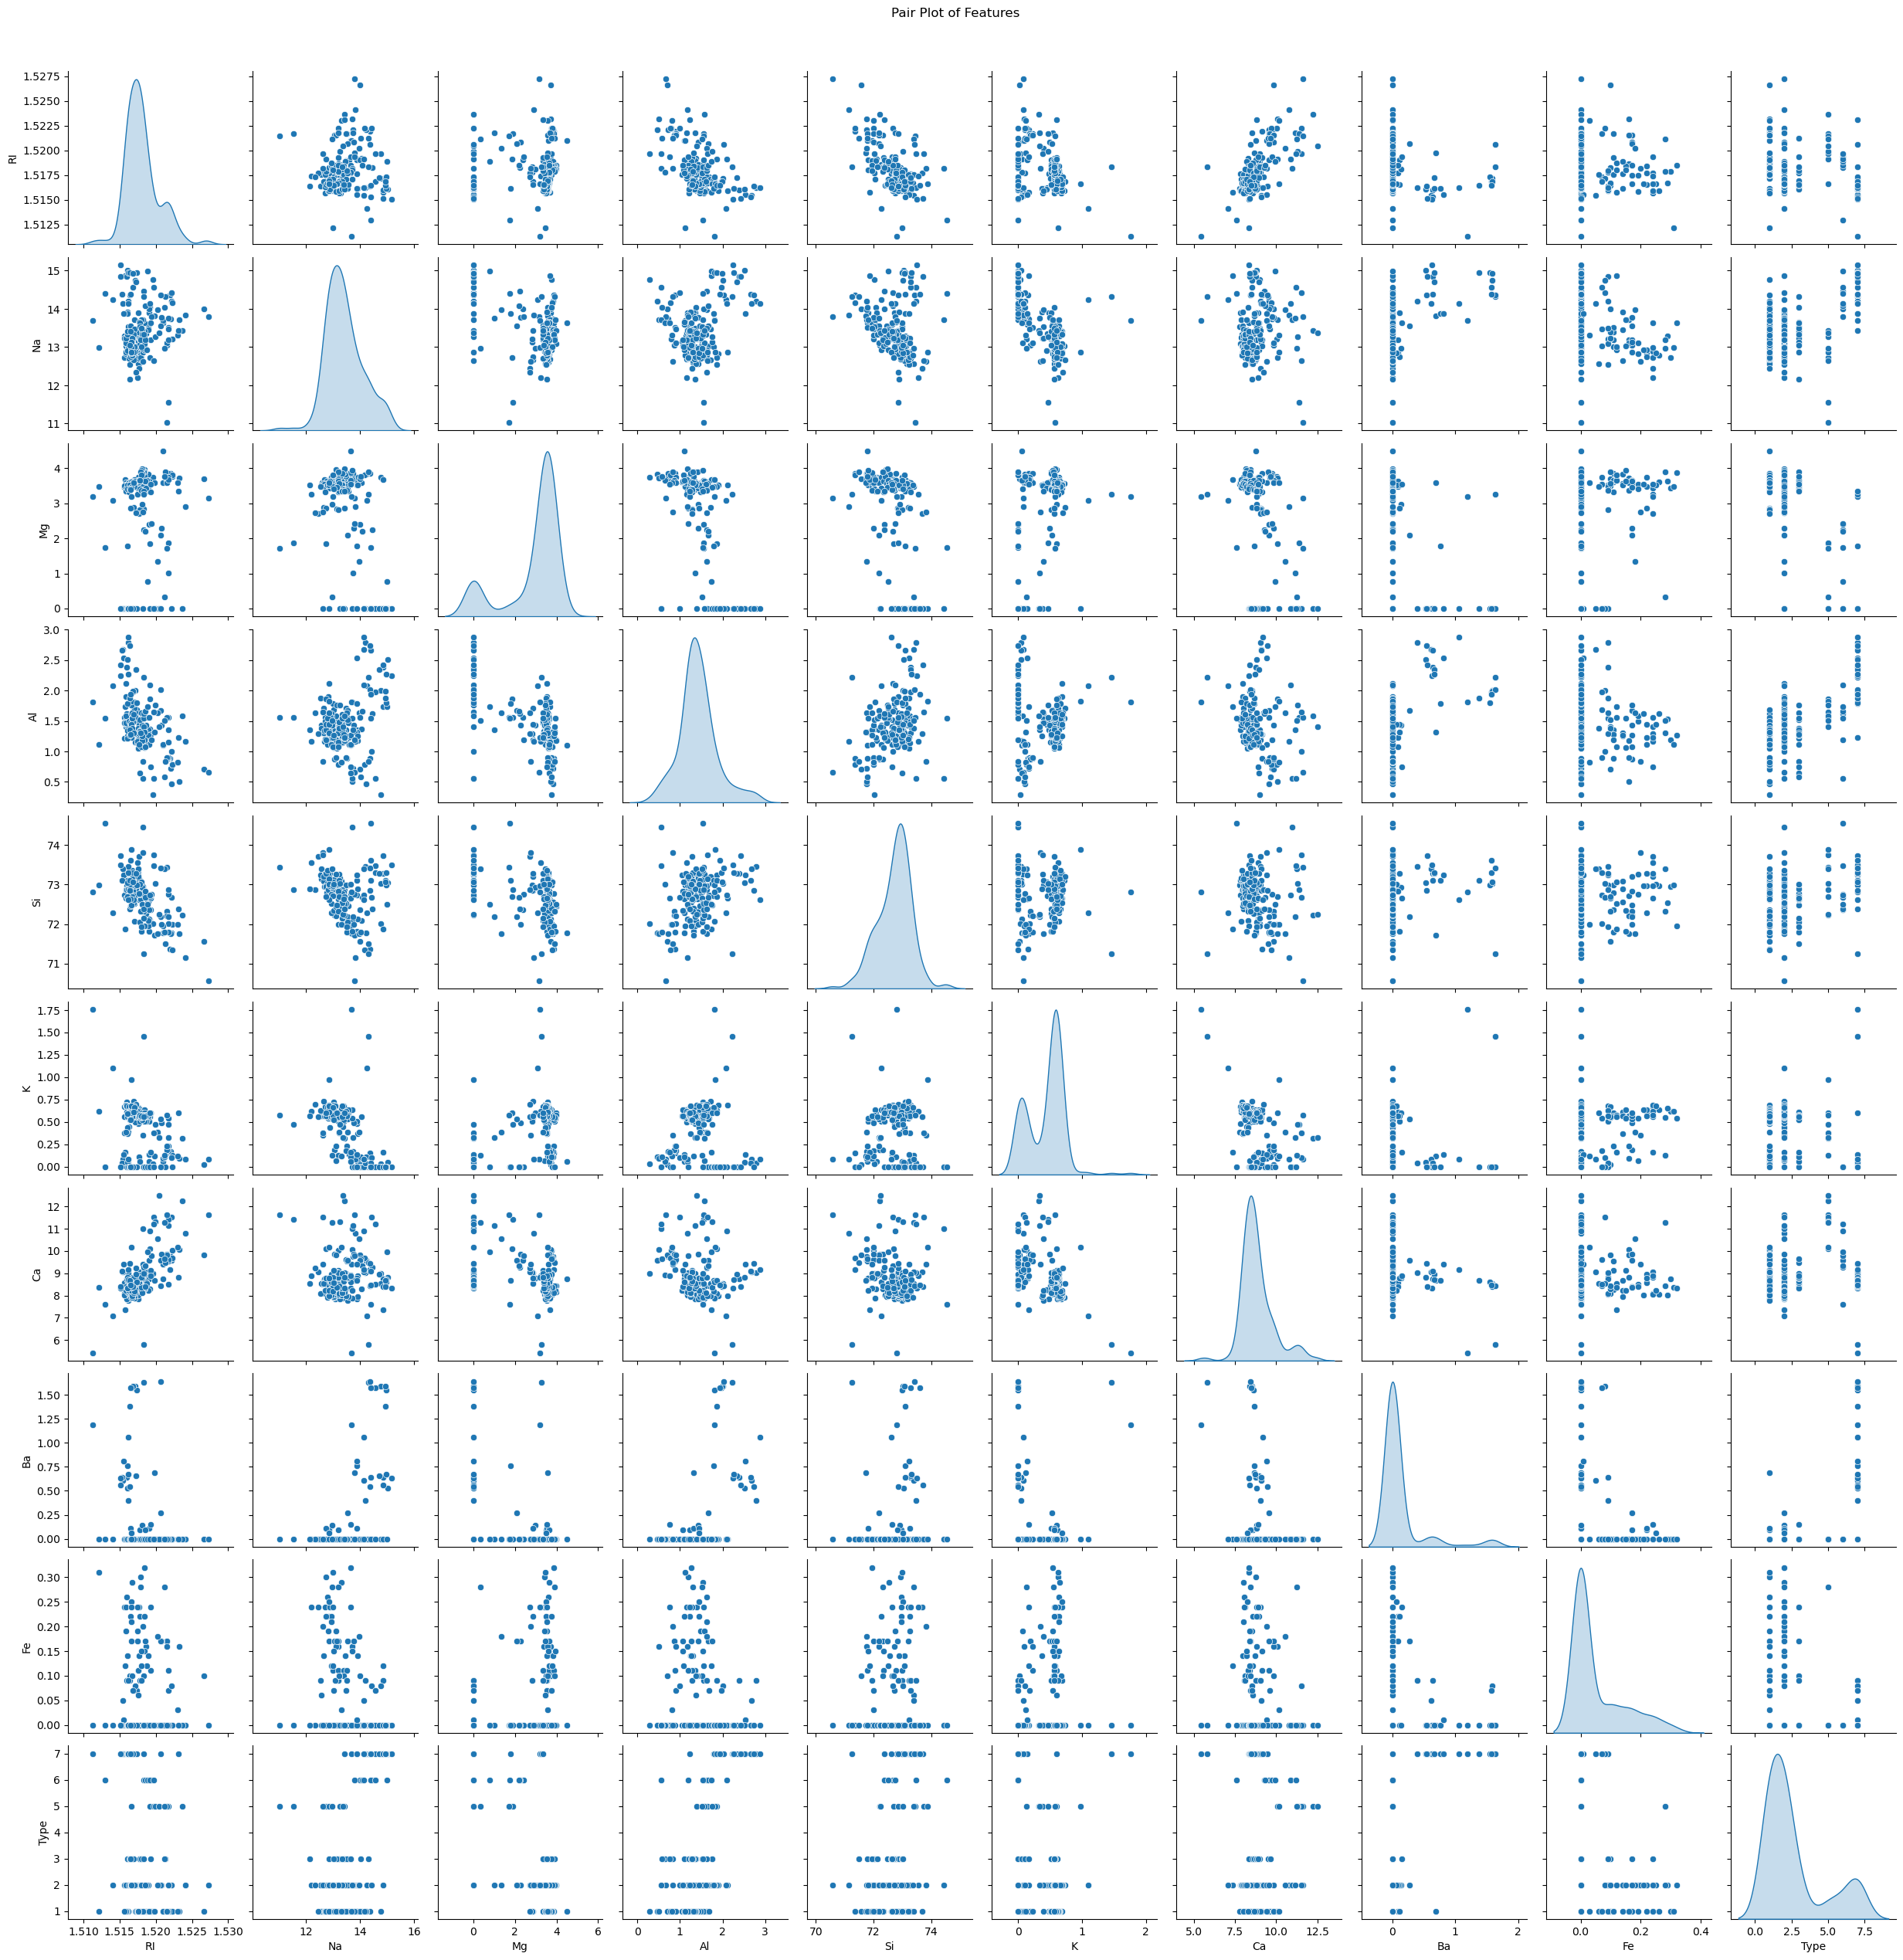

In [31]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_cleaned, diag_kind="kde")  # kde for smoother distribution curves
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

In [33]:
missing_values = df_cleaned.isnull().sum()
missing_values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [34]:
# Random forest does not need feature scaling so we are commenting the below code
# Standardization
#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

#print(df_scaled)

           RI        Na        Mg        Al        Si         K        Ca  \
0    1.291781  0.332127  1.233397 -0.729105 -1.612464 -1.319609 -0.075653   
1   -0.197832  0.704398  0.551581 -0.141722  0.016082  0.172091 -1.008147   
2   -0.824346  0.168328  0.513277  0.264928  0.461790 -0.147559 -1.058826   
3   -0.175926 -0.308179  0.620529 -0.299864 -0.189629  0.491741 -0.612851   
4   -0.281075 -0.218834  0.566903 -0.412822  0.616073  0.420708 -0.764888   
..        ...       ...       ...       ...       ...       ...       ...   
189 -0.727959  1.419158 -2.206325  2.975928  0.221793 -1.532708  0.633854   
190 -0.802440  1.076668 -2.206325  3.292211 -0.189629 -1.248575  0.360187   
191 -0.530805  2.238153 -2.206325  1.281553  0.581788 -1.532708 -0.430406   
192  1.134057  1.404267 -2.206325  1.349328  1.198921 -1.532708 -0.389863   
193 -0.679766  1.434048 -2.206325  1.168595  1.524630 -1.532708 -0.349320   

           Ba        Fe      Type  
0   -0.346292 -0.603056 -0.799161  
1  

In [40]:
target = df_cleaned[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
208,7
209,7
210,7
211,7


In [41]:
features = df_cleaned.drop('Type', axis = 1)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 42 )

In [43]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

C:\Users\91980\AppData\Local\Temp\ipykernel_14904\4240620681.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7436
Precision: 0.7292
Recall: 0.7436
F1-score: 0.7261


In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.85      0.73        13
           2       0.85      0.73      0.79        15
           3       0.00      0.00      0.00         3
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.74        39
   macro avg       0.69      0.71      0.69        39
weighted avg       0.73      0.74      0.73        39



In [46]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Decision Trees
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)

# Predictions & Evaluation
y_pred_bagging = bagging_model.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

C:\Users\91980\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Accuracy: 0.717948717948718


In [51]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with Decision Trees
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(x_train, y_train)

# Predictions & Evaluation
y_pred_boost = adaboost_model.predict(x_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_boost))

AdaBoost Accuracy: 0.41025641025641024


C:\Users\91980\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
##Interview Questions

1. Explain Bagging and Boosting methods. How is it different from each other.
Ans:
Bagging and Boosting are ensemble learning techniques used to improve the performance and accuracy of machine learning models by combining multiple weak learners, typically decision trees.
Bagging:
- Trains models independently in parallel on random subsets (with replacement).
- Combines results using voting (classification) or averaging (regression).
- Reduces variance, good for overfitting models.
- Example: Random Forest.

Boosting:
- Trains models sequentially, each correcting errors of the previous.
- Focuses more on hard-to-predict instances.
- Reduces bias, improves accuracy.
- Example: XGBoost, AdaBoost.

2. Explain how to handle imbalance in the data.
Ans:
- Resampling: Oversample minority (e.g., SMOTE), or undersample majority.
- Class weights: Assign higher penalty to misclassifying minority class.
- Use proper metrics: Prefer F1-score, Precision, Recall, AUC over accuracy.
- Special algorithms: Use models like Balanced Random Forest, EasyEnsemble.

SyntaxError: invalid syntax (3511251744.py, line 3)